Project 1. CRISPR

You work at the frontier of science. The biotech company you’re with is aiming to edit thousands of sites in mammalian genomes (we'll set aside the ethical considerations for now). The wet lab team is excited—they’ve run their CRISPR experiments on a mouse cell culture and sequenced the results!

Now, they need to determine if the experiment succeeded. They’ve asked you to quickly develop a pipeline to analyze the sequencing data and:

Identify the induced mutations from the CRISPR experiment.
Detect potential off-target effects.
The lab originally intended to edit the following sites, all located on chromosome 2:

36937210            36996899            85400441            85776687              85918029

86198668            86236802            86658391            87049235

HINT: Run a variant-calling pipeline on the genome and identify all changes. Compare the results against the provided list.

To achieve full credit (100%), submit the following deliverables:

A DataFrame showing the data corresponding to the intended mutations.
A DataFrame of off-target mutations.
A summary DataFrame displaying the number of mutations and genotypes per chromosome, considering only off-target changes.
A simple plot illustrating any aspect of the project (for example, data from points 1, 2, or 3 above).

In [1]:
###### CRISPR sample

!gdown 1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
!gdown 1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS

!gdown 1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar


Downloading...
From (original): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
From (redirected): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO&confirm=t&uuid=c63a3ccb-6263-4f08-937f-5894db9bc164
To: /content/CRISPR.R1.fastq
100% 2.67G/2.67G [00:33<00:00, 78.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS
From (redirected): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS&confirm=t&uuid=f1cda8bc-b381-4ab1-952e-18647f134210
To: /content/CRISPR.R2.fastq
100% 2.67G/2.67G [00:33<00:00, 80.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar
From (redirected): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar&confirm=t&uuid=406e1957-1184-4718-9f1e-f63dcc47b5b9
To: /content/MM10.tar.gz
100% 3.91G/3.91G [00:59<00:00, 65.9MB/s]


In [2]:
!apt install bwa
!apt install samtools
!apt install bcftools
!apt-get update
!apt-get install -y seqtk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 195 kB of archives.
After this operation, 466 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 bwa amd64 0.7.17-6 [195 kB]
Fetched 195 kB in 1s (256 kB/s)
Selecting previously unselected package bwa.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../bwa_0.7.17-6_amd64.deb ...
Unpacking bwa (0.7.17-6) ...
Setting up bwa (0.7.17-6) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 li

In [5]:
!tar -xvzf MM10.tar.gz

MM10/
MM10/Mouse.ann
MM10/Mouse.pac
MM10/Mouse.fasta
MM10/Mouse.bwt
MM10/Mouse.sa
MM10/Mouse.amb


In [9]:
!ls MM10

Mouse.amb  Mouse.bwt	Mouse.fasta.amb  Mouse.fasta.bwt  Mouse.fasta.sa  Mouse.sa
Mouse.ann  Mouse.fasta	Mouse.fasta.ann  Mouse.fasta.pac  Mouse.pac


In [11]:
#isolating only chromosome 2 for analysis
!samtools faidx MM10/Mouse.fasta chr2 > chr2.fasta

In [12]:
#Indexing chromosme 2
!bwa index chr2.fasta

[bwa_index] Pack FASTA... 2.22 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=364226448, availableWord=37628116
[BWTIncConstructFromPacked] 10 iterations done. 62069712 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 114669760 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 161416816 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 202961696 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 239882848 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 272694448 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 301853424 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 327765984 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 350793104 characters processed.
[bwt_gen] Finished constructing BWT in 97 iterations.
[bwa_index] 279.52 seconds elapse.
[bwa_index] Update BWT... 1.74 sec
[bwa_inde

In [13]:
# aligning sequencing reads to a reference genome.
!bwa mem chr2.fasta CRISPR.R1.fastq CRISPR.R2.fastq > aligned_reads_chr2.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 184, 1, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (200, 234, 309)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 527)
[M::mem_pestat] mean and std.dev: (238.14, 59.15)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 636)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 100000 reads in 38.417 CPU sec, 41.235 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 67, 0, 0)
[M::mem_pestat] skip orientation FF 

In [ ]:
#converting to a BAM file, and sort
!samtools view -Sb aligned_reads_chr2.sam > aligned_reads_chr2.bam
!samtools sort aligned_reads_chr2.bam -o sorted_reads_chr2.bam

In [ ]:
#indexing the sorted file
!samtools index sorted_reads_chr2.bam

In [18]:
#Identified genetic variations compared to the reference genome
!bcftools mpileup -Ou -f chr2.fasta sorted_reads_chr2.bam | bcftools call -mv -Oz -o variants_chr2.vcf.gz #identify potential variants (SNPs, indels) in your aligned reads

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
!bcftools annotate -a MM10/Mouse.gtf -c CHROM,POS,REF,ALT,QUAL,DP -Oz -o annotated_variants_chr2.vcf.gz filtered_variants_chr2.vcf.gz

In [2]:
#improving the accuracy by removing low-quality reads
!bcftools filter -i 'QUAL>20 && DP>10' variants_chr2.vcf.gz -Oz -o filtered_variants_chr2.vcf.gz

In [9]:
!pip install cyvcf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.2 MB/s eta 0:00:00


In [14]:
!bcftools view variants_chr2.vcf.gz -Ov > filtered_variants_chr2.vcf

In [50]:
import cyvcf2
import pandas as pd

vcf_path = 'filtered_variants_chr2.vcf'

# Convert VCF to TSV
with open('output.tsv', 'w') as file:
    for variant in cyvcf2.VCF(vcf_path):
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)

# Load TSV into DataFrame
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
df = pd.read_csv("output.tsv", delimiter="\t", header=None, names=columns)
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr2,3051590,NaN,T,C,52.203800,NaN,1
1,chr2,3051604,NaN,A,C,45.253502,NaN,1
2,chr2,3051621,NaN,T,C,47.249500,NaN,1
3,chr2,3051632,NaN,A,G,55.332600,NaN,1
4,chr2,3051635,NaN,A,G,59.256699,NaN,1
...,...,...,...,...,...,...,...,...
70678,chr2,182002062,NaN,A,T,30.957300,NaN,1
70679,chr2,182002065,NaN,G,A,40.932098,NaN,3
70680,chr2,182002067,NaN,G,A,40.932098,NaN,3
70681,chr2,182002068,NaN,A,T,30.957300,NaN,1


In [29]:
df['QUAL'] = pd.to_numeric(df['QUAL'], errors='coerce')

filtered_df = df[df['QUAL'] > 60]
filtered_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
6,chr2,3051696,None,T,TGTCC,96.563599,None,1
29,chr2,3052361,None,G,T,111.313004,None,1
31,chr2,3052386,None,T,G,129.570007,None,1
32,chr2,3052401,None,C,G,131.856003,None,1
33,chr2,3052429,None,A,G,84.802002,None,1
...,...,...,...,...,...,...,...,...
70671,chr2,182002007,None,A,G,95.972900,None,1
70672,chr2,182002013,None,T,C,71.400002,None,1
70673,chr2,182002021,None,G,A,65.766403,None,1
70675,chr2,182002039,None,A,G,77.494499,None,1


In [49]:
#Identifying Intended Mutations:
intended_sites = [36937210, 36996899, 85400441, 85776687, 85918029, 86198668, 86236802, 86658391, 87049235]

intended_mutations_df = variants_df[variants_df['POS'].isin(intended_sites)]
intended_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
16660,chr2,36937210,NaN,C,T,194.453003,NaN,1
16667,chr2,36996899,NaN,CTTTTT,CTTTTTT,185.158005,NaN,3
33179,chr2,85400441,NaN,A,G,228.171005,NaN,3
33346,chr2,85776687,NaN,T,A,115.749001,NaN,1
33665,chr2,85918029,NaN,T,C,118.149002,NaN,1
34023,chr2,86198668,NaN,A,G,228.250000,NaN,3
34039,chr2,86236802,NaN,CT,CTT,228.218994,NaN,3
34510,chr2,86658391,NaN,C,CG,174.298996,NaN,3
34657,chr2,87049235,NaN,G,T,102.330002,NaN,3


In [48]:
#Detecting Off-Target Effects:
off_target_mutations_df = variants_df[~variants_df['POS'].isin(intended_sites)]
off_target_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr2,3051590,NaN,T,C,52.203800,NaN,1
1,chr2,3051604,NaN,A,C,45.253502,NaN,1
2,chr2,3051621,NaN,T,C,47.249500,NaN,1
3,chr2,3051632,NaN,A,G,55.332600,NaN,1
4,chr2,3051635,NaN,A,G,59.256699,NaN,1
...,...,...,...,...,...,...,...,...
70678,chr2,182002062,NaN,A,T,30.957300,NaN,1
70679,chr2,182002065,NaN,G,A,40.932098,NaN,3
70680,chr2,182002067,NaN,G,A,40.932098,NaN,3
70681,chr2,182002068,NaN,A,T,30.957300,NaN,1


In [35]:
#Summarizing Off-Target Mutations
summary_df = off_target_mutations_df.groupby('CHROM')['POS'].agg(['count', 'nunique'])
summary_df.columns = ['Mutation Count', 'Genotype Count']
summary_df

,Mutation Count,Genotype Count
CHROM,,
chr2,70674,70665


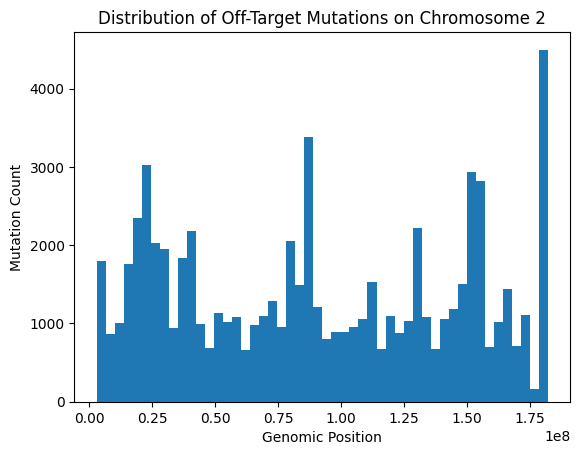

In [36]:

import matplotlib.pyplot as plt

plt.hist(off_target_mutations_df['POS'], bins=50)
plt.xlabel('Genomic Position')
plt.ylabel('Mutation Count')
plt.title('Distribution of Off-Target Mutations on Chromosome 2')
plt.show()

In [44]:
off_target_mutations_df = variants_df[~variants_df['POS'].isin(intended_sites)]
off_target_mutations_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,GENOTYPE
0,chr2,3051590,NaN,T,C,52.203800,NaN,1
1,chr2,3051604,NaN,A,C,45.253502,NaN,1
2,chr2,3051621,NaN,T,C,47.249500,NaN,1
3,chr2,3051632,NaN,A,G,55.332600,NaN,1
4,chr2,3051635,NaN,A,G,59.256699,NaN,1
...,...,...,...,...,...,...,...,...
70678,chr2,182002062,NaN,A,T,30.957300,NaN,1
70679,chr2,182002065,NaN,G,A,40.932098,NaN,3
70680,chr2,182002067,NaN,G,A,40.932098,NaN,3
70681,chr2,182002068,NaN,A,T,30.957300,NaN,1


In [46]:
off_target_summary_df = off_target_mutations_df.groupby('CHROM').agg(
    mutation_count=('POS', 'count'),
    genotype_counts=('GENOTYPE', 'value_counts')
)
off_target_summary_df

,mutation_count,genotype_counts
chr2,70674.0,NaN
"(chr2, 1)",NaN,44866.0
"(chr2, 3)",NaN,25808.0
